In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [31]:
df_pit = pd.read_csv("puntos_de_interes_2.csv")
df_lud = pd.read_csv("2023_locals_us_desti.csv")
df_lud

,Any,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Seccio_censal,Desc_us_desti_principal,Concepte,Nombre
0,2023,1,Ciutat Vella,1,el Raval,1,Aparcaments,Superfície_m2,3027.00
1,2023,1,Ciutat Vella,1,el Raval,1,Oficines,Superfície_m2,14433.00
2,2023,1,Ciutat Vella,1,el Raval,1,Religiós,Superfície_m2,688.00
3,2023,1,Ciutat Vella,1,el Raval,1,Sanitat,Superfície_m2,2897.00
4,2023,1,Ciutat Vella,1,el Raval,1,Espectacles,Superfície_m2,319.00
...,...,...,...,...,...,...,...,...,...
25951,2023,10,Sant Martí,71,Provençals del Poblenou,237,Aparcaments,Valor_€,1109488.32
25952,2023,10,Sant Martí,71,Provençals del Poblenou,237,Sanitat,Valor_€,1390703.47
25953,2023,10,Sant Martí,71,Provençals del Poblenou,237,Ensenyament i cultura,Valor_€,742999.50
25954,2023,10,Sant Martí,71,Provençals del Poblenou,237,Comerç,Valor_€,537742.13


In [32]:
df_pit = df_pit.drop(["Unnamed: 0"], axis=1)
df_pit

,name,street,streetNum,neighbourhood,district,zipcode,longLongitude,longLatitude,density
0,Hotel d'Entitats de Can Guardiola,Cuba,2,Sant Andreu,Sant Andreu,8030,41.429959,2.188553,1
1,Bar Marsella,C Sant Pau,65,el Raval,Ciutat Vella,8001,41.378278,2.171224,2
2,Telefèric de Barcelona,Pg Joan Borbó C Barcelona,88,la Barceloneta,Ciutat Vella,8039,41.373250,2.187876,1
3,Universitat Politècnica de Catalunya,C Jordi Girona,31,Pedralbes,Les Corts,8034,41.388942,2.116538,1
4,Casa del Guarda - Espai d'Interpretació del P...,Camí del Pantà,40,"Vallvidrera, el Tibidabo i les Planes",Sarrià-Sant Gervasi,8017,41.415598,2.097385,1
...,...,...,...,...,...,...,...,...,...
866,Mercat Sarrià,Pg Reina Elisenda Montcada,8,Sarrià,Sarrià-Sant Gervasi,8034,41.399836,2.120723,1
867,Mercat Santa Caterina,Av Francesc Cambó,16,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,8003,41.386395,2.178177,2
868,Mercat Sants,C Sant Jordi,6,Sants,Sants-Montjuïc,8028,41.374741,2.133755,1
869,Mercat Hostafrancs,Carrer de la Creu Coberta,93,Hostafrancs,Sants-Montjuïc,8014,41.375162,2.143854,2


In [33]:
grouped = df_lud.groupby(['Nom_barri', 'Desc_us_desti_principal'])['Nombre'].sum().reset_index()

In [34]:
data_frontend = []
for barrio in grouped['Nom_barri'].unique():
    datos_barrio = grouped[grouped['Nom_barri'] == barrio]
    datos = {
        'barrio': barrio,
        'data': datos_barrio[['Desc_us_desti_principal', 'Nombre']].to_dict(orient='records')
    }
    data_frontend.append(datos)


In [35]:
data_frontend[0]

{'barrio': 'Baró de Viver',
 'data': [{'Desc_us_desti_principal': 'Administració Pública',
   'Nombre': 5941439.8},
  {'Desc_us_desti_principal': 'Aparcaments', 'Nombre': 3347958.48},
  {'Desc_us_desti_principal': 'Comerç', 'Nombre': 4836544.130000001},
  {'Desc_us_desti_principal': 'Ensenyament i cultura', 'Nombre': 2368571.79},
  {'Desc_us_desti_principal': 'Habitatge', 'Nombre': 36623495.760000005},
  {'Desc_us_desti_principal': 'Indústria', 'Nombre': 3668116.79},
  {'Desc_us_desti_principal': 'Magatzem', 'Nombre': 151720.63},
  {'Desc_us_desti_principal': 'Oficines', 'Nombre': 614934.73},
  {'Desc_us_desti_principal': 'Religiós', 'Nombre': 94404.75},
  {'Desc_us_desti_principal': 'Sòl sense edificar', 'Nombre': 501702.5}]}

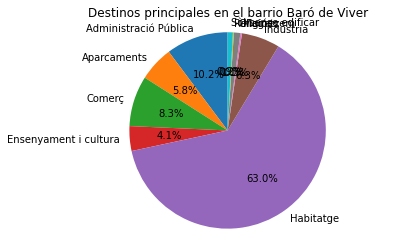

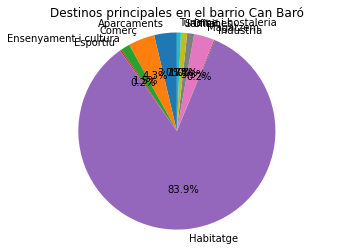

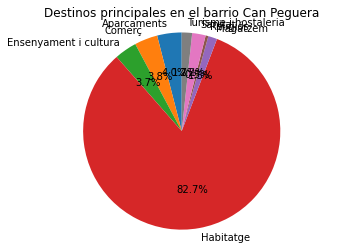

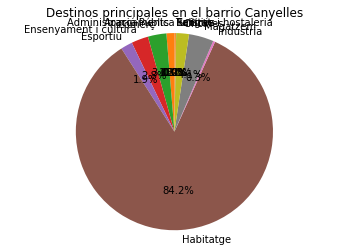

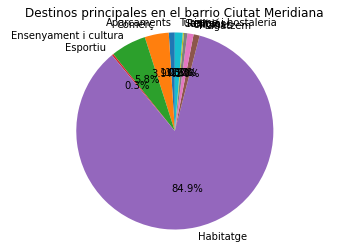

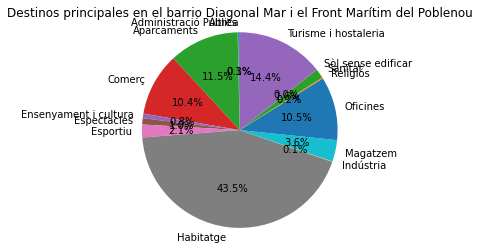

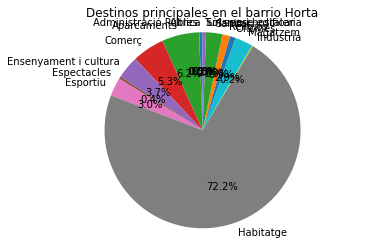

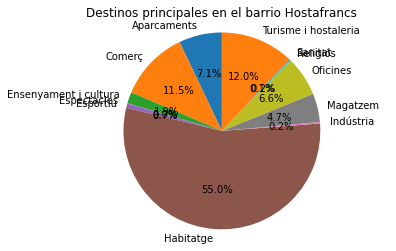

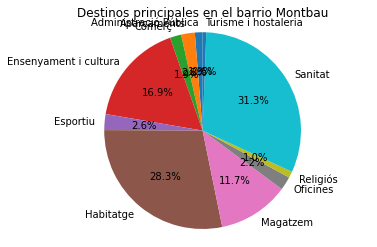

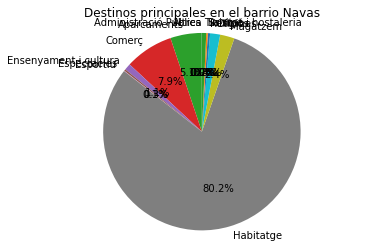

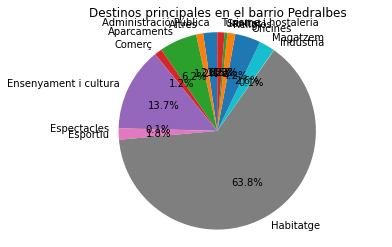

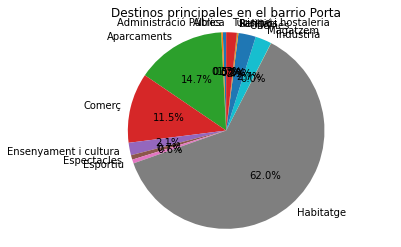

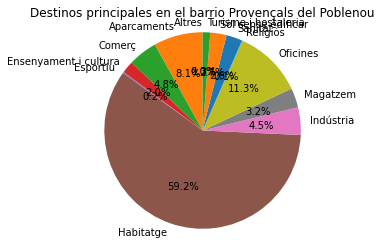

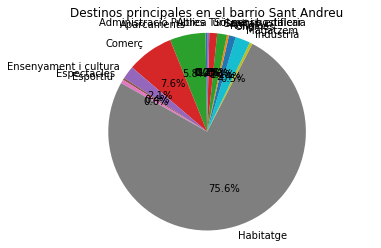

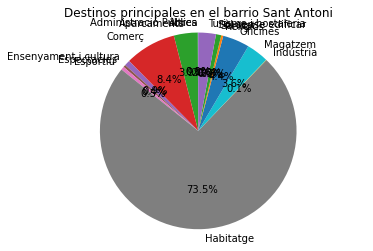

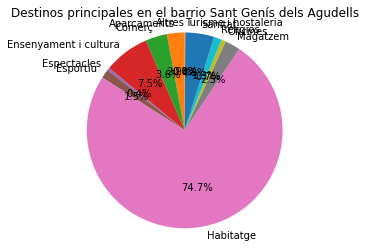

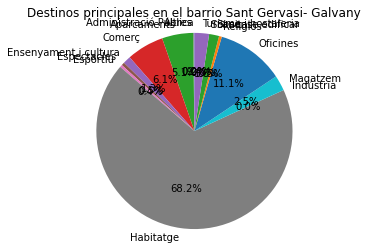

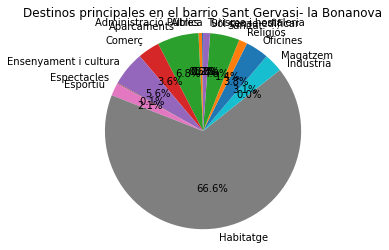

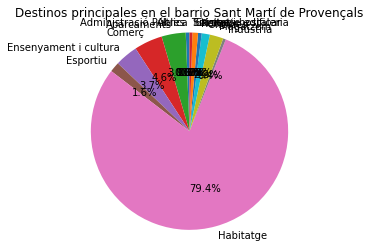

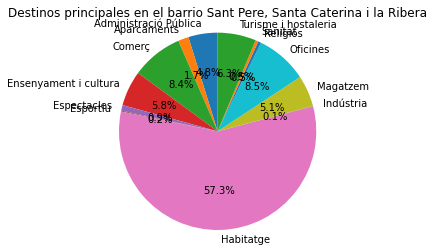

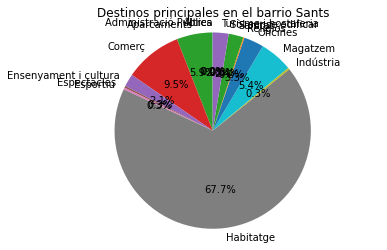

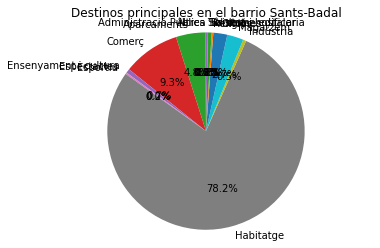

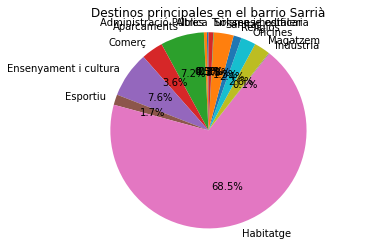

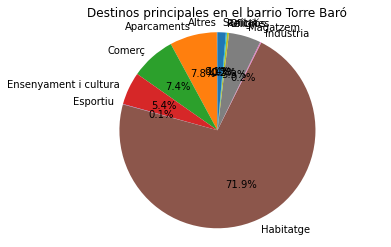

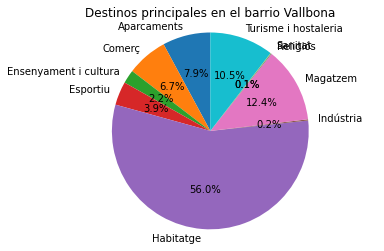

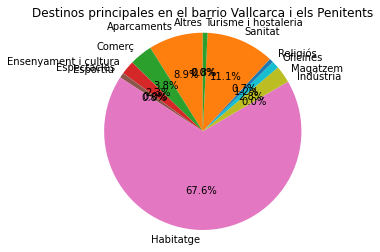

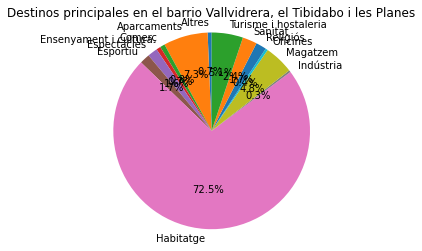

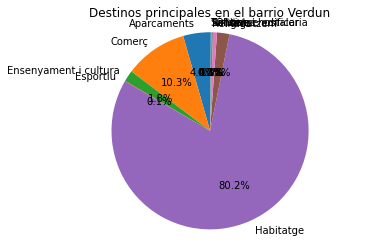

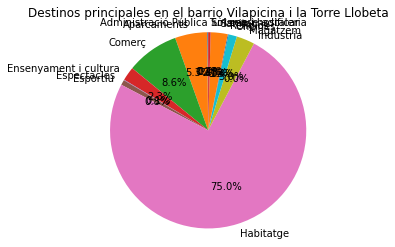

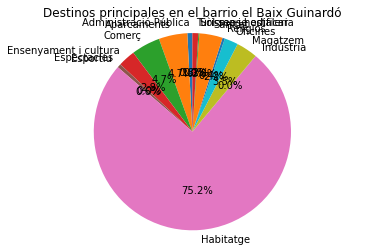

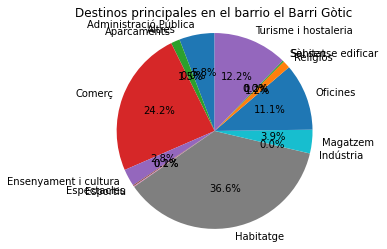

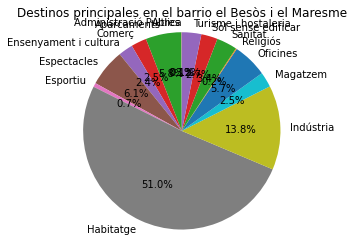

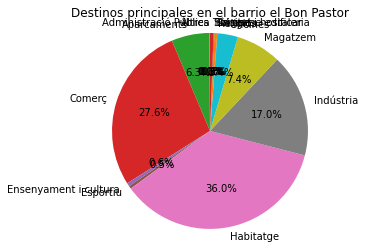

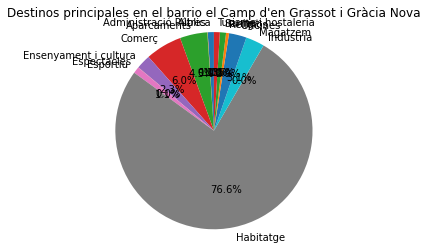

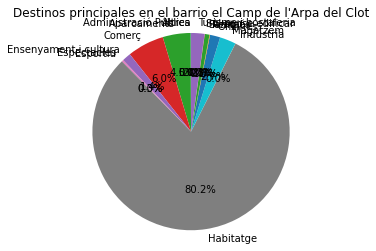

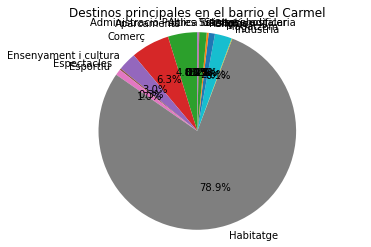

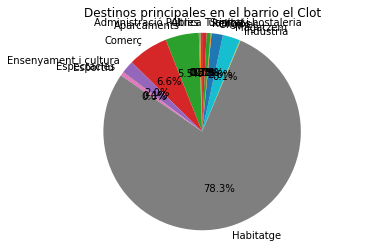

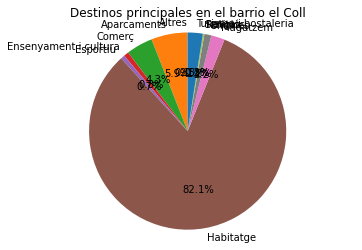

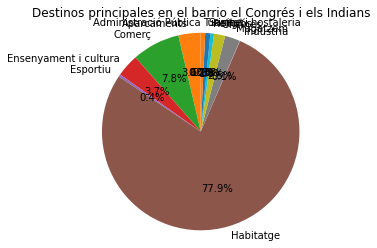

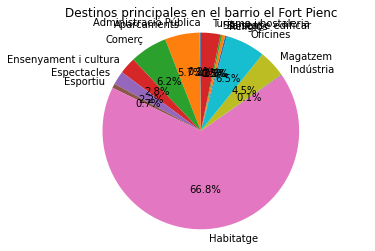

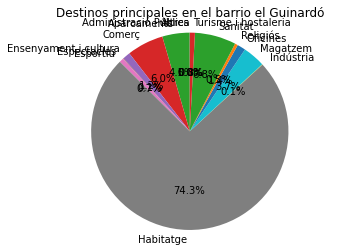

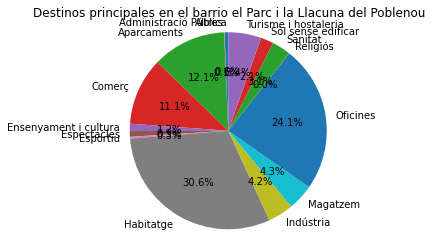

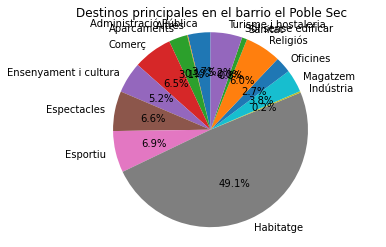

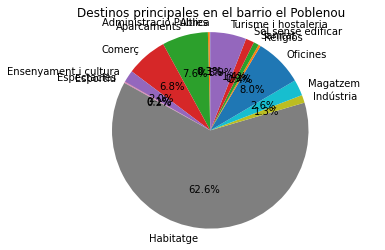

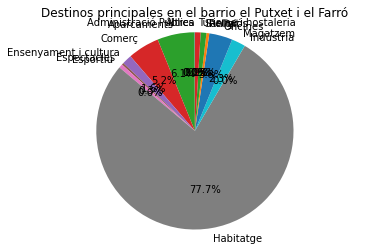

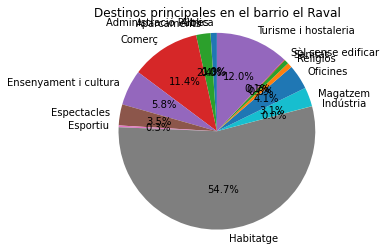

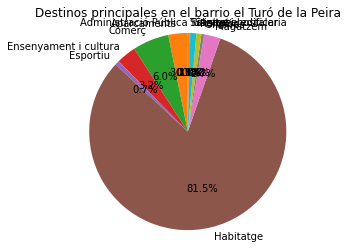

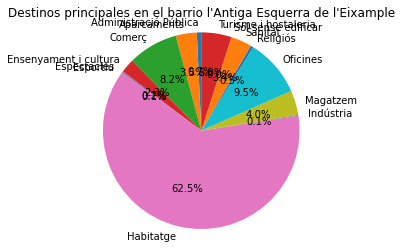

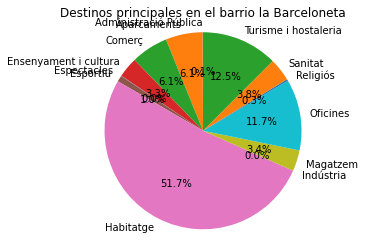

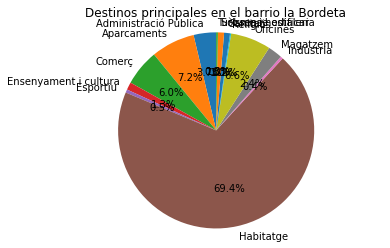

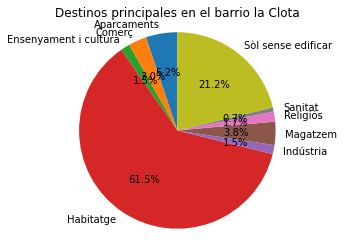

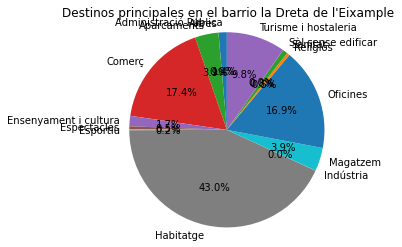

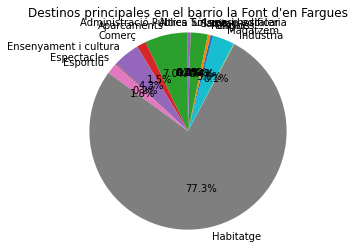

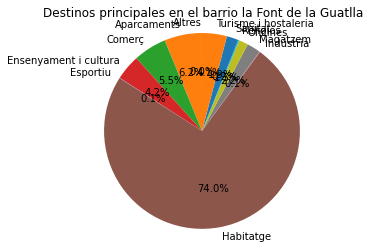

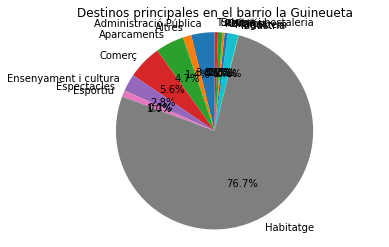

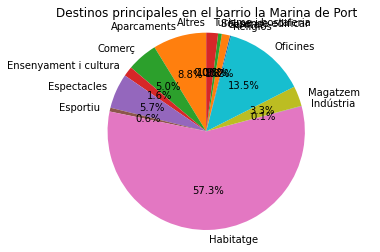

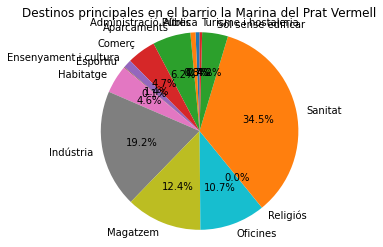

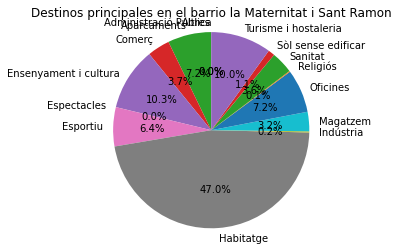

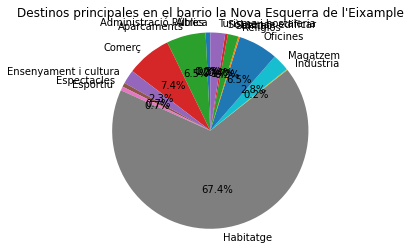

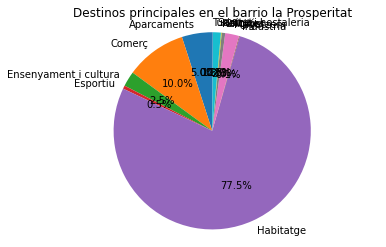

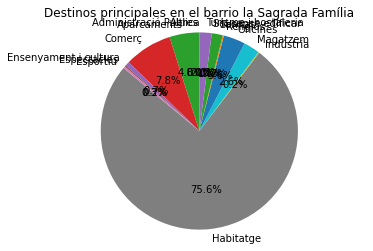

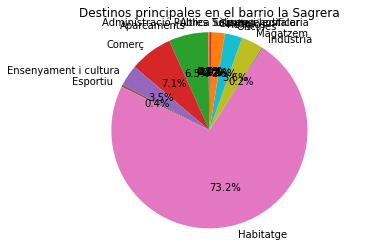

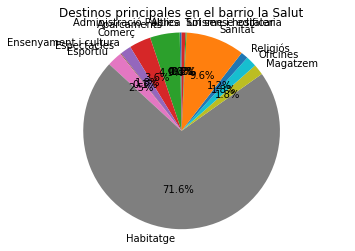

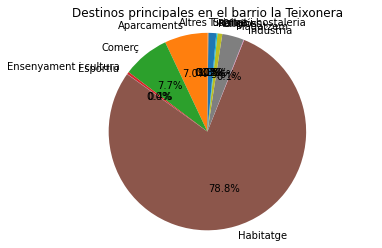

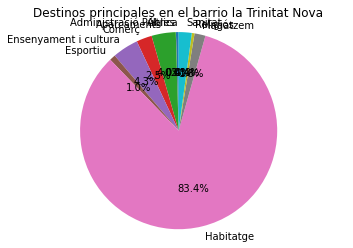

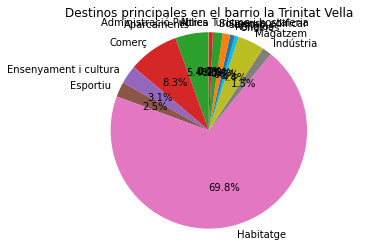

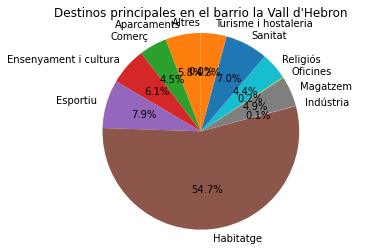

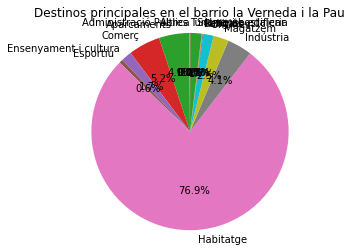

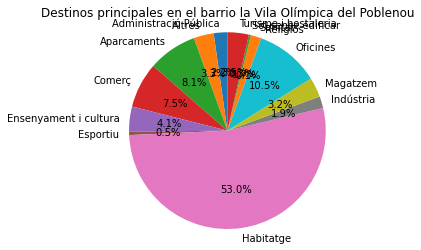

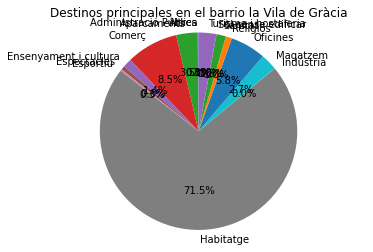

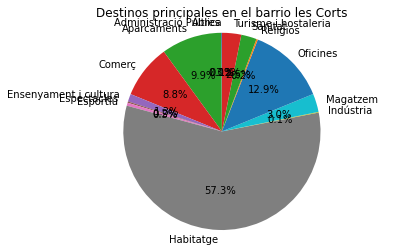

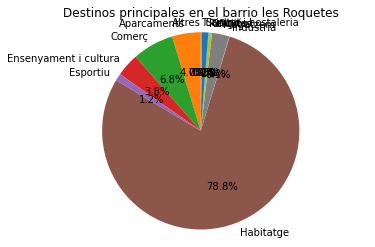

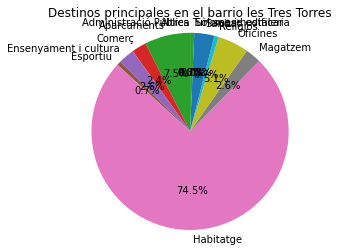

In [36]:
for datos_barrio in data_frontend:
    barrio = datos_barrio['barrio']
    data = datos_barrio['data']
    
    desc_us_desti = [item['Desc_us_desti_principal'] for item in data]
    nombres = [item['Nombre'] for item in data]
    
    plt.pie(nombres, labels=desc_us_desti, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Destinos principales en el barrio {barrio}')
    plt.show()

In [38]:
archivo_json = './graficas/pie_tipos_lud_barrio.json'

# Guardar los datos como archivo JSON
with open(archivo_json, 'w') as archivo:
    json.dump(data_frontend, archivo)

FileNotFoundError: [Errno 2] No such file or directory: './graficas/pie_tipos_lud_barrio.json'